### Información general del dataset
---

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

# Definimos el dataframe
df = pd.read_csv('Student Depression Dataset.csv')

""" Ya que el dataset esta basado en estudiantes los registros que tienen valores en las columnas 'Job Satisfaction' 
 y 'Work Pressure' son muy pocos, para mayor claridad en el dataset se dropean estas columnas. """
df = df.drop(['Job Satisfaction', 'Work Pressure'], axis=1)

# Creamos un dataframe con solo las personas que tienen depresion.
df_depre = df[df['Depression'] == 1]

In [296]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [294]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,7.656104,2.943837,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,1.470707,1.361148,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


### Tamaño del dataset
---

In [272]:
# Definimos variables
count_people = len(df)
count_dep_people = len(df_depre)

# Mostramos respuestas
print(f'Num of people in the dataset: \t\t\t{count_people}') # Cuanta gente hay en el dataset?
print(f'Num of depressed people in the dataset: \t{count_dep_people}') # Cuanta gente con depresion hay en el dataset?
print(f'% of depressed people in the dataset: \t\t{round(count_dep_people / count_people * 100, 2)}%') # % de gente tiene depresion en el dataset?

Num of people in the dataset: 			27901
Num of depressed people in the dataset: 	16336
% of depressed people in the dataset: 		58.55%


### Depresión por género
---

Number of females with depression: 	7221
Number of males with depression: 	9115
% of depressed females: 		25.88%
% of depressed males: 			32.67%


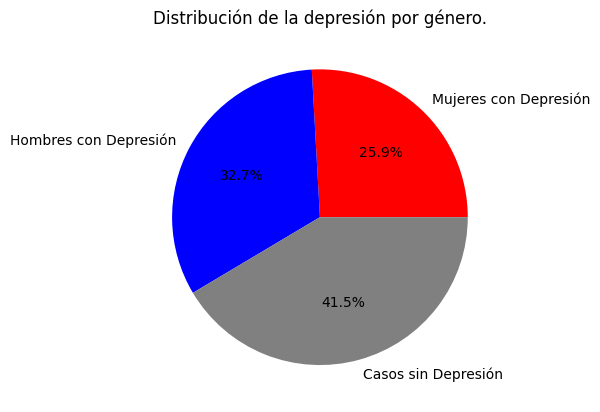

In [273]:
# Definimos variables
female_dep_count = df_depre['Gender'].value_counts().get('Female')
male_dep_count = df_depre['Gender'].value_counts().get('Male')
percent_of_dep_females = female_dep_count / count_people
percent_of_dep_males = male_dep_count / count_people

# Mostramos respuestas
print(f'Number of females with depression: \t{female_dep_count}') # Cuantas mujeres tienen depresion?
print(f'Number of males with depression: \t{male_dep_count}') # Cuantos hombres tienen depresion?
print(f'% of depressed females: \t\t{round(percent_of_dep_females * 100, 2)}%') # Que % de mujeres tiene depresion?
print(f'% of depressed males: \t\t\t{round(percent_of_dep_males * 100, 2)}%') # Que porcentaje de hombres tiene depresion?

# Representacion
fig, ax = plt.subplots()
ax.set_title('Distribución de la depresión por género.')
ax.pie([percent_of_dep_females * 100, percent_of_dep_males * 100, (1 - percent_of_dep_males - percent_of_dep_females) * 100],
        labels=['Mujeres con Depresión', 'Hombres con Depresión', 'Casos sin Depresión'],  
        autopct='%1.1f%%',
        colors=['red', 'blue', 'gray']);

### Depresión por edad
---

The age range with most depression is [20, 21, 22, 23, 24] with a total of 9026 cases in the dataset.
This represents the 32.35% of the cases in the dataset and the 55.25% of depressed cases in the dataset.

The age with most depression is 24 with a total of 2258 cases in the dataset.
This represents the 8.09% of the cases in the dataset and the 13.82% of depressed cases in the dataset.


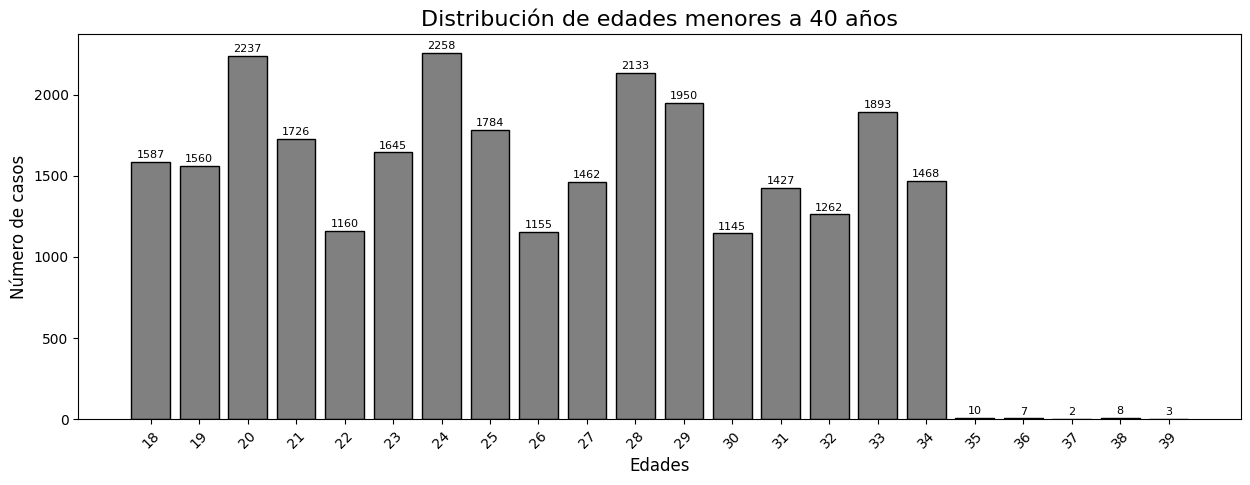

In [274]:
# Definimos variables
float_unique_ages: list = df['Age'].unique()
unique_ages: dict = {}
for age in float_unique_ages: unique_ages[int(age)] = 0
for age in df['Age']: 
    if int(age) in unique_ages: unique_ages[int(age)] += 1

max_age_key = max(unique_ages, key=unique_ages.get)
max_age_value = unique_ages[24]

age_range = []
cases_in_range = 0
keys = sorted(unique_ages.keys())
for x in range(len(unique_ages) - 4):
    actual_range = [keys[x], keys[x+1], keys[x+2], keys[x+3], keys[x+4]]
    sum_range = 0
    for age in actual_range:
        sum_range += unique_ages[age] 
    if sum_range > cases_in_range:
        age_range = actual_range
        cases_in_range = sum_range

# Mostramos respuestas
print(f'The age range with most depression is {age_range} with a total of {cases_in_range} cases in the dataset.')
print(f'This represents the {round(cases_in_range / count_people * 100, 2)}% of the cases in the dataset and the {round(cases_in_range / count_dep_people * 100, 2)}% of depressed cases in the dataset.', end='\n\n')
print(f'The age with most depression is {max_age_key} with a total of {max_age_value} cases in the dataset.')
print(f'This represents the {round(max_age_value / count_people * 100, 2)}% of the cases in the dataset and the {round(max_age_value / count_dep_people * 100, 2)}% of depressed cases in the dataset.')

# Representacion, se muestran solo los datos para edades menores a 40 años ya que el numero de casos por encima de este umbral es minimo (casos<50)
filtered_ages = {age: count for age, count in unique_ages.items() if age < 40}
plt.figure(figsize=(15, 5))
plt.bar(filtered_ages.keys(), filtered_ages.values(), align='center', width=0.8, color='gray', edgecolor='black')
plt.xticks(ticks=list(filtered_ages.keys()), rotation=45)
plt.title('Distribución de edades menores a 40 años', fontsize=16)
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)
for x, y in zip(filtered_ages.keys(), filtered_ages.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)

plt.show()

### Presión de estudios y finanzas.
---

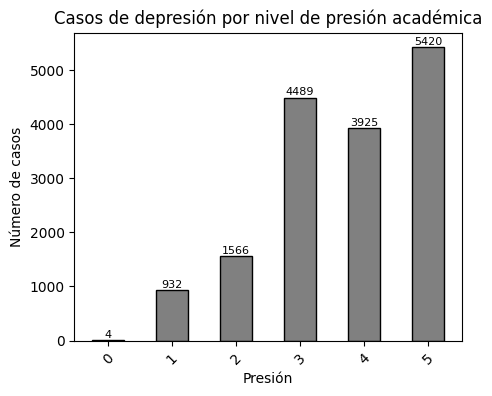

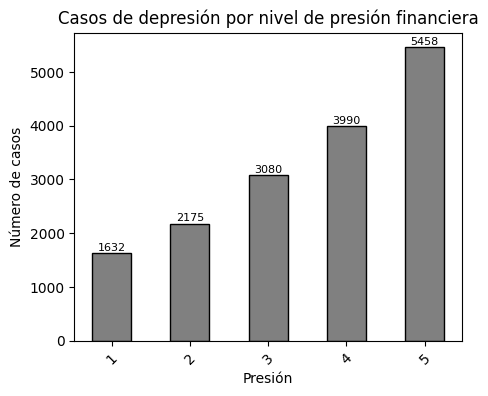

In [288]:
# Definimos variables
unique_academic_pressure_values = df_depre['Academic Pressure'].unique()
unique_financial_pressure_values = df_depre['Financial Stress'].unique()

academic_stress_dict: dict = {}
financial_stress_dict: dict = {}

for uapv in sorted(unique_academic_pressure_values): academic_stress_dict[int(uapv)] = 0
for ufpv in sorted(unique_financial_pressure_values): 
    if ufpv in [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]:
        financial_stress_dict[int(ufpv)] = 0

for value in df_depre['Academic Pressure']:
    if value in academic_stress_dict: academic_stress_dict[value] += 1
for value in df_depre['Financial Stress']:
    if value in financial_stress_dict: financial_stress_dict[value] += 1

# Representacion
plt.figure(figsize=(5, 4))
plt.bar(academic_stress_dict.keys(), academic_stress_dict.values(), align='center', width=0.5, color='gray', edgecolor='black')
plt.xticks(ticks=list(academic_stress_dict.keys()), rotation=45)
plt.title('Casos de depresión por nivel de presión académica', fontsize=12)
plt.xlabel('Presión', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(academic_stress_dict.keys(), academic_stress_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(financial_stress_dict.keys(), financial_stress_dict.values(), align='center', width=0.5, color='gray', edgecolor='black')
plt.xticks(ticks=list(financial_stress_dict.keys()), rotation=45)
plt.title('Casos de depresión por nivel de presión financiera', fontsize=12)
plt.xlabel('Presión', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(financial_stress_dict.keys(), financial_stress_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Satisfacción y resultados en los estudios.
---

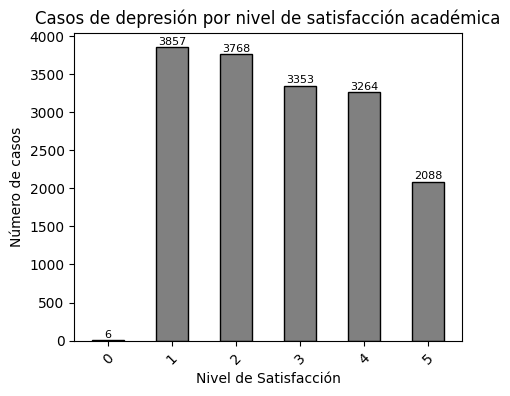

In [289]:
# Definimos variables
unique_satisfaction_values = df_depre['Study Satisfaction'].unique()
satisfaction_dict: dict = {}
for satisfaction in sorted(unique_satisfaction_values): satisfaction_dict[int(satisfaction)] = 0

for value in df_depre['Study Satisfaction']:
    if value in academic_stress_dict: satisfaction_dict[value] += 1

# Representacion
plt.figure(figsize=(5, 4))
plt.bar(satisfaction_dict.keys(), satisfaction_dict.values(), align='center', width=0.5, color='gray', edgecolor='black')
plt.xticks(ticks=list(satisfaction_dict.keys()), rotation=45)
plt.title('Casos de depresión por nivel de satisfacción académica', fontsize=12)
plt.xlabel('Nivel de Satisfacción', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(satisfaction_dict.keys(), satisfaction_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Hábitos de alimentación y sueño.
---

### Otros factores
---